In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# RMSE results
rmse_df = pd.read_csv("../reports/rmse_results.csv")
rmse_df.head()

,pipeline,missing_strategy,outlier_strategy,rmse
0,LinearRegression,mean,iqr,806.573252
1,Ridge,mean,iqr,786.275683
2,LinearRegression,mean,zscore,722.248201
3,Ridge,mean,zscore,708.261573
4,LinearRegression,mean,none,965.384597


In [4]:
# sort by RMSE
rmse_df_sorted = rmse_df.sort_values(by="rmse")
rmse_df_sorted.head(10)

,pipeline,missing_strategy,outlier_strategy,rmse
15,Ridge,drop,zscore,655.094102
19,Lasso,drop,zscore,656.496750
14,LinearRegression,drop,zscore,673.887897
13,Ridge,drop,iqr,690.383531
12,LinearRegression,drop,iqr,698.297478
3,Ridge,mean,zscore,708.261573
17,Ridge,drop,none,712.816035
9,Ridge,median,zscore,713.288016
22,XGBRegressor,drop,zscore,717.521248
16,LinearRegression,drop,none,721.857842


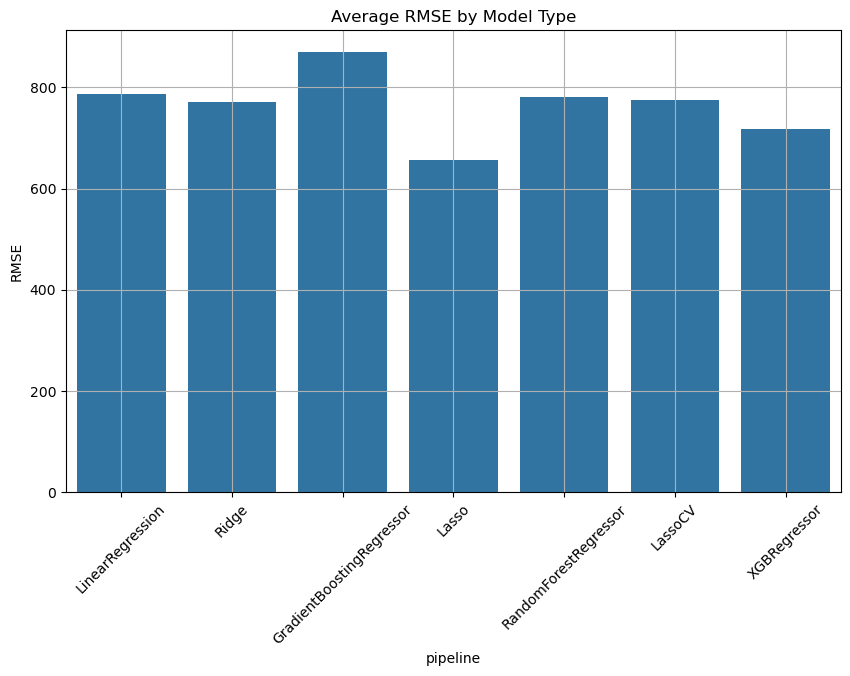

In [9]:
# barplot of RMSE
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x="pipeline", y="rmse", errorbar=None)
plt.title("Average RMSE by Model Type")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

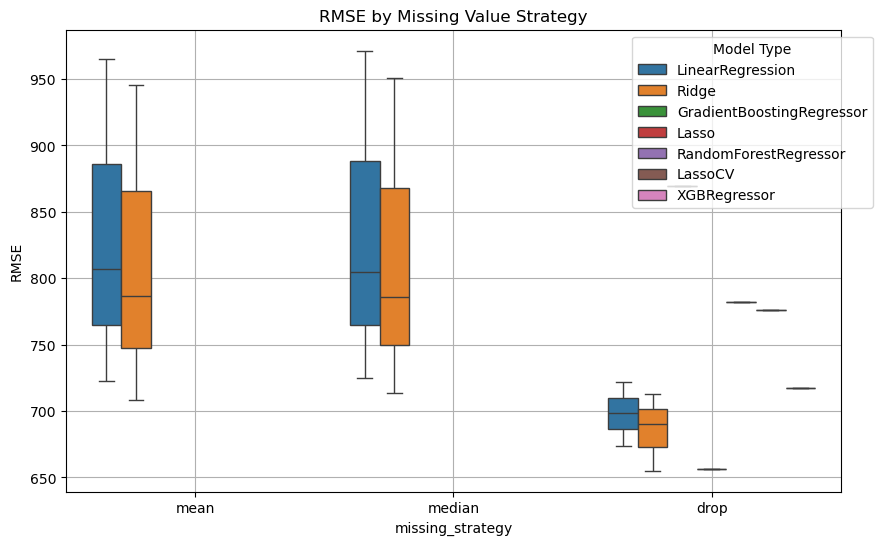

In [15]:
# RMSE by missing value strategy
plt.figure(figsize=(10, 6))
sns.boxplot(data=rmse_df, x="missing_strategy", y="rmse", hue="pipeline")
plt.legend(title="Model Type", bbox_to_anchor=(1.05, 1), loc='upper right')
plt.title("RMSE by Missing Value Strategy")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

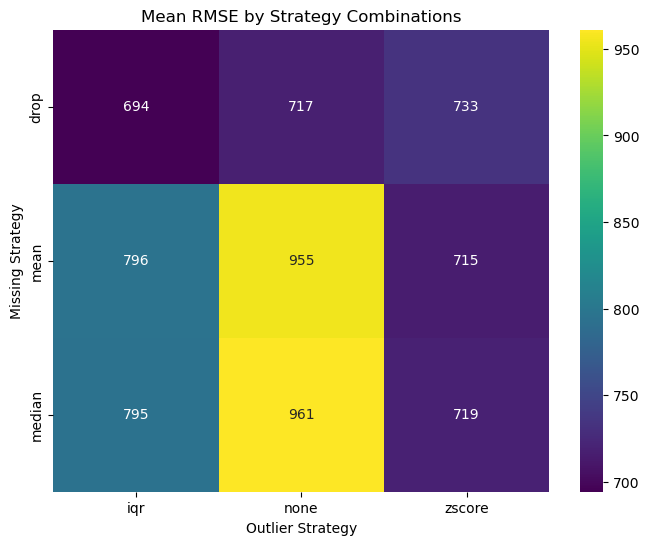

In [16]:
# heatmap of strategy combinations
pivot = rmse_df.pivot_table(index="missing_strategy", columns="outlier_strategy", values="rmse", aggfunc="mean")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis")
plt.title("Mean RMSE by Strategy Combinations")
plt.ylabel("Missing Strategy")
plt.xlabel("Outlier Strategy")
plt.show()

In [17]:
best_row = rmse_df_sorted.iloc[0]
print("🔍 Best Model:")
display(best_row)

🔍 Best Model:


pipeline                 Ridge
missing_strategy          drop
outlier_strategy        zscore
rmse                655.094102
Name: 15, dtype: object